In [1]:
from libraries import lib
from libraries.NeuralStates import *
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
N=2; J=1; Gamma=1
states = [n for n in range(2**N)]

In [23]:
H = lib.TFIM_hamiltonian(N, J, Gamma)
eigs = H.eigenstates()
gs = eigs[1][0]
gs

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.65328148]
 [0.27059805]
 [0.27059805]
 [0.65328148]]

In [24]:
elocs = []
for x in states:
    eloc = 0
    for xprime in lib.generate_adjacencies(x, N):
        eloc += lib.calc_H_elem(N, J, Gamma, x, xprime) * gs[xprime][0] / gs[x][0]
    elocs.append(eloc)
elocs = np.array(elocs)

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


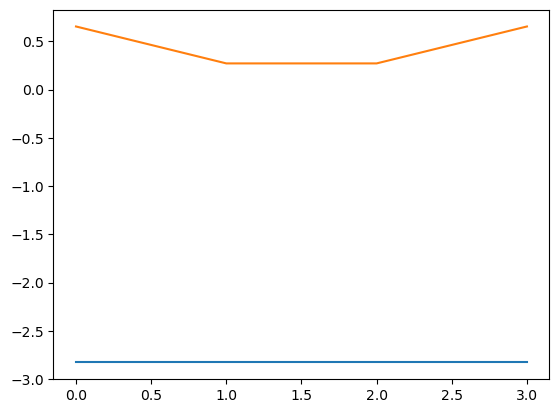

In [25]:
plt.plot(states, elocs)
plt.plot(states, abs(gs.full().flatten()))
plt.show()

In [26]:
eigs[0][0]

np.float64(-2.82842712474619)

In [27]:
elocs.mean()

np.complex128(-2.82842712474619+0j)

In [28]:
expect_elocs = 0
for x in states:
    expect_elocs += elocs[x] * abs(gs[x][0]) ** 2
print(expect_elocs)

(-2.8284271247461903+0j)


In [29]:
sum(abs(gs[x][0]) ** 2 for x in states)

np.float64(1.0)

In [30]:
gs.dag() @ lib.TFIM_hamiltonian(N, J, Gamma) @ gs

(-2.82842712474619+0j)

In [31]:
H_full = H.full()

In [32]:
psi_h_psi = 0
for x in states:
    for xprime in lib.generate_adjacencies(x, N):
        psi_h_psi += gs[x][0].conj() * H_full[x][xprime]  * gs[xprime][0]
print(psi_h_psi)

(-2.82842712474619+0j)


In [33]:
psi_h_psi = 0
for x in states:
    for xprime in lib.generate_adjacencies(x, N):
        psi_h_psi += gs[x][0].conj() * lib.calc_H_elem(N, J, Gamma, x, xprime) * gs[xprime][0]
print(psi_h_psi)

(-2.82842712474619+0j)


In [34]:
gs.dims

[[2, 2], [1, 1]]

In [35]:
qt.fidelity(gs, qt.rand_ket(N*[2]))

np.float64(0.33277795528815496)

In [41]:
variances = []
fidelities = []
for i in range(10000):
    random_state = qt.rand_ket(N*[2])
    elocs = []
    for x in states:
        eloc = 0
        for xprime in lib.generate_adjacencies(x, N):
            eloc += lib.calc_H_elem(N, J, Gamma, x, xprime) * random_state[xprime][0] / random_state[x][0]
        elocs.append(eloc)
    elocs = np.array(elocs)
    e_elocs = sum(abs(random_state[x][0]) ** 2 * elocs[x] for x in states)
    e_elocs2 = sum(abs(random_state[x][0]) ** 2 * elocs[x] ** 2 for x in states)
    # print(e_elocs, e_elocs2)
    variances.append(abs(e_elocs2 - e_elocs ** 2))
    fidelities.append(qt.fidelity(gs, random_state))

In [42]:
elocs

array([ 0.92128848-0.79953746j,  2.74507587-0.19352034j,
        2.17801998-0.1414775j , -4.70017015+2.94544365j])

In [43]:
sum(abs(random_state[x][0])**2 for x in states)

np.float64(0.9999999999999998)

In [44]:
lib.generate_adjacencies(3, 10)

[2, 1, 7, 11, 19, 35, 67, 131, 259, 515, 3]

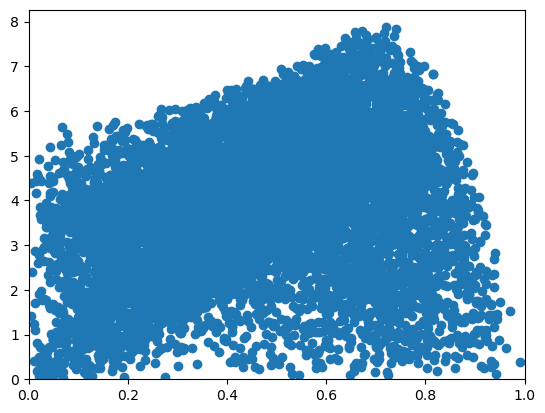

In [45]:
plt.scatter(fidelities, variances)
plt.xlim(0, 1)
plt.ylim(0)
plt.show()

In [46]:
np.array(fidelities).mean()

np.float64(0.4579811979830065)